In [37]:
# Set up
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [19]:
# How many branches
branches = df['Branch'].unique()
print("There are {}  branches {} ".format(len(branches),branches))

There are 3  branches ['A' 'C' 'B'] 


In [20]:
# cities
locations = df['City'].unique().tolist()
print("There are {}  cities {} ".format(len(locations),locations))

There are 3  cities ['Yangon', 'Naypyitaw', 'Mandalay'] 


In [22]:
# Product line
products = df['Product line'].unique().tolist()
print('There are {} categories of products\n{}'.format(len(products), products))

There are 6 categories of products
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


In [24]:
# Payment
payment = df['Payment'].unique().tolist()
print('There are {} ways of payment\n{}'.format(len(payment), payment))

There are 3 ways of payment
['Ewallet', 'Cash', 'Credit card']


- The supremarket line has 3 branches in 3 cities that provides 6 categories of products which can be purchased in 3 ways.

- Q1: Which city is the more gross income?

In [45]:
city = df.groupby('City')['gross income'].sum()
income_per_city = city.sort_values()

Text(0, 0.5, 'Total gross income')

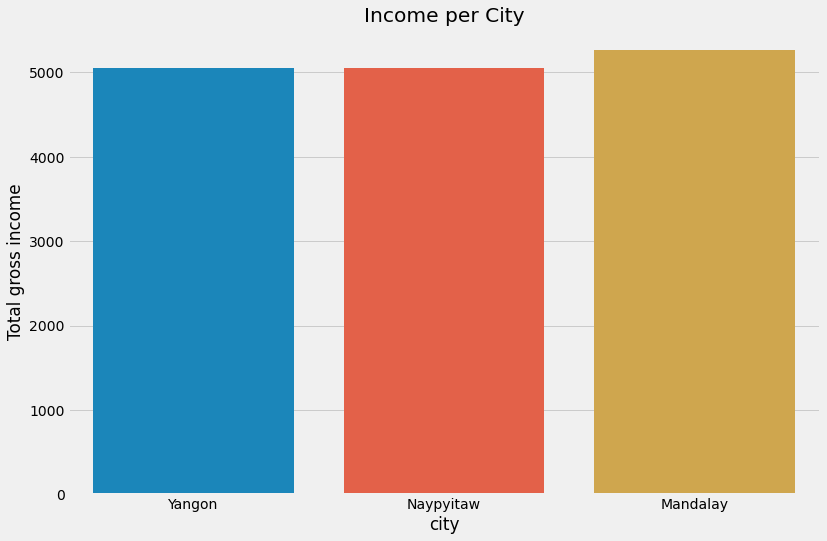

In [78]:
plt.figure(figsize=(12,8))
sns.barplot(x= locations,y= income_per_city,data= df )
plt.title('Income per City')
plt.xlabel('city')
plt.ylabel('Total gross income')

- The Mandalay city between cities is the most total gross income.

- Q2: Is there one branch per city ?

In [84]:
Branch_per_city = df.groupby('City')['Branch'].value_counts()

In [85]:
Branch_per_city.sort_values()

City       Branch
Naypyitaw  C         328
Mandalay   B         332
Yangon     A         340
Name: Branch, dtype: int64

Text(0, 0.5, 'No of branches')

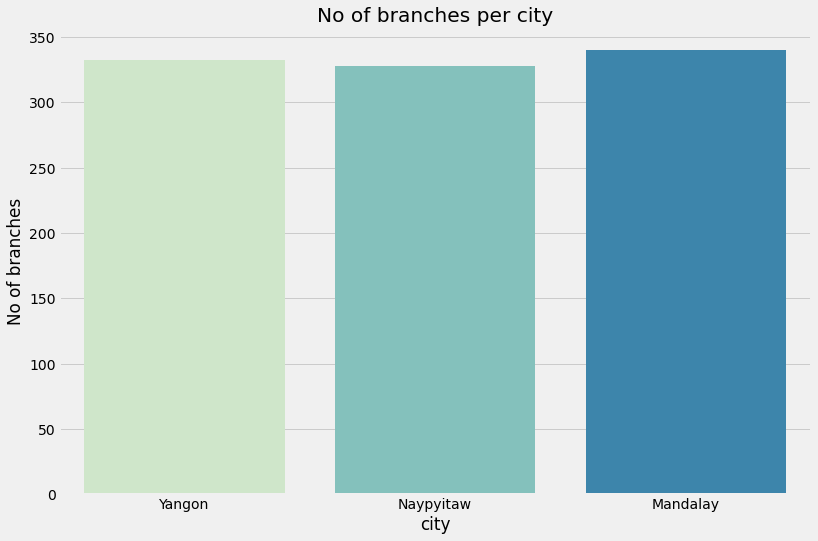

In [86]:
plt.figure(figsize=(12,8))
sns.barplot(x=locations,y= Branch_per_city,data= df,ci=None, palette="GnBu")
plt.title('No of branches per city')
plt.xlabel('city')
plt.ylabel('No of branches')

Yes, each city has one branch such as <b> Yangon</b> cirt has branch <b> A </b>.

- Q3: Which product line has the most average rating ?

In [107]:
product_line_rating = df.groupby(['Product line'])['Rating'].mean()

In [109]:
product_line_rating.sort_values()

Product line
Home and lifestyle        6.837500
Sports and travel         6.916265
Electronic accessories    6.924706
Health and beauty         7.003289
Fashion accessories       7.029213
Food and beverages        7.113218
Name: Rating, dtype: float64

Text(0, 0.5, 'Product_Line')

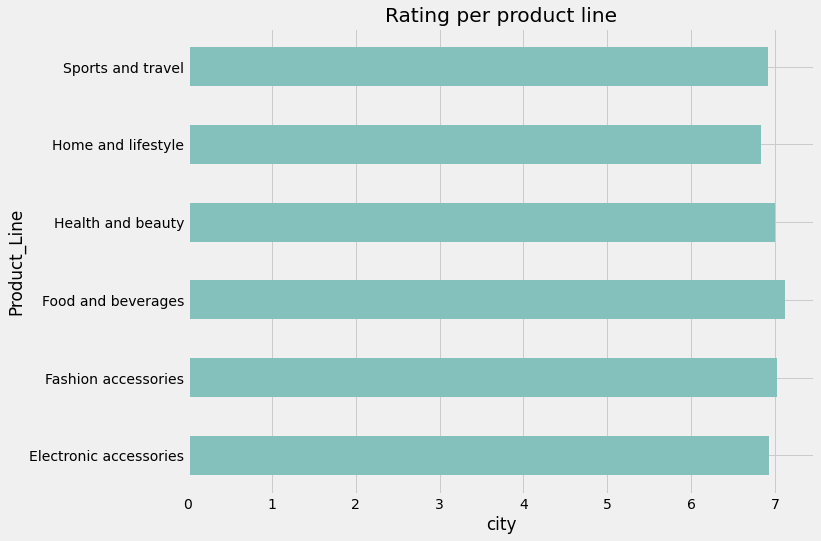

In [135]:
plt.figure(figsize=(10,8))
product_line_rating.plot.barh(x='Product line', rot=0,color= '#84C1BC')
plt.title("Rating per product line")
plt.xlabel('AVG Rating')
plt.ylabel('Product_Line')

- Food and beverages product line has the most rating.

- Q4: Which customer has the most purchased quantity?

In [141]:
customers= df['Customer type'].unique().tolist()
print('There are {} categories of customers\n{}'.format(len(customers), customers))

There are 2 categories of customers
['Member', 'Normal']


In [148]:
quantity_per_customer = df.groupby('Customer type')['Quantity'].sum()
quantity_per_customer.sort_values( ascending=False)

Customer type
Member    2785
Normal    2725
Name: Quantity, dtype: int64

Text(0, 0.5, 'quantity')

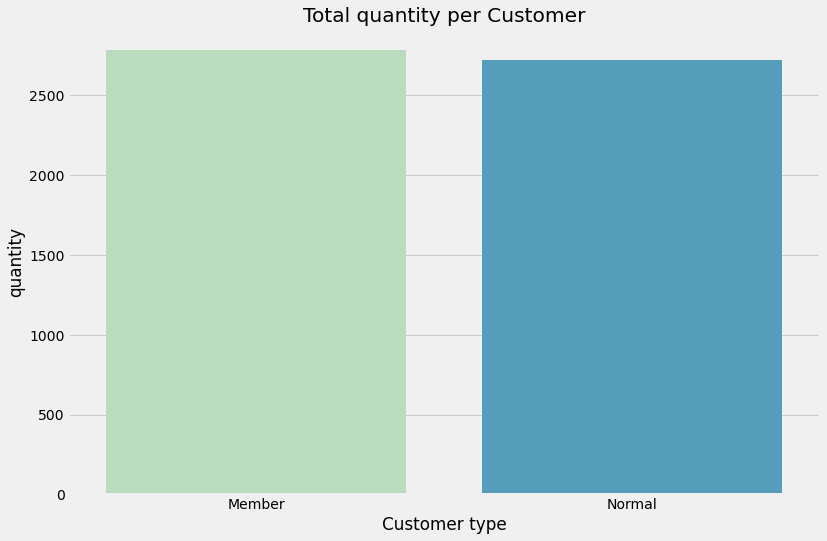

In [151]:
plt.figure(figsize=(12,8))
sns.barplot(x=customers,y= quantity_per_customer,data= df,ci=None, palette="GnBu")
plt.title('Total quantity per Customer')
plt.xlabel('Customer type')
plt.ylabel('quantity')

- The member customers has the most purchased quantity.